# This is a Demo on how to use AI to analyze

## Data to use
[EC Transaction](https://github.com/Blackmonarch4574/eCommerce-Transactions-Dataset/blob/main/Transactions.csv)

## データの分析

### データーセットの概要
***Prompt***
```
Please give me a brief of this dataset
```

このデータセットには、7つの列（TransactionID、CustomerID、ProductID、TransactionDate、Quantity、TotalValue、Price）を持つ1,000件の取引記録が含まれています。取引IDは一意であり、顧客は199人、商品は100種類が含まれています。すべてのフィールドに欠損値はありません。数量（Quantity）は1から4の範囲で、価格（Price）は約16.08から497.76まで変動しています。

In [5]:
import pandas as pd

# Load the dataset
file_path = 'c:/Users/kuangyi.zhu/Downloads/Transactions.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.describe(include='all'), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


(None,
        TransactionID CustomerID ProductID      TransactionDate     Quantity  \
 count           1000       1000      1000                 1000  1000.000000   
 unique          1000        199       100                 1000          NaN   
 top           T00992      C0109      P059  2024-04-21 10:52:24          NaN   
 freq               1         11        19                    1          NaN   
 mean             NaN        NaN       NaN                  NaN     2.537000   
 std              NaN        NaN       NaN                  NaN     1.117981   
 min              NaN        NaN       NaN                  NaN     1.000000   
 25%              NaN        NaN       NaN                  NaN     2.000000   
 50%              NaN        NaN       NaN                  NaN     3.000000   
 75%              NaN        NaN       NaN                  NaN     4.000000   
 max              NaN        NaN       NaN                  NaN     4.000000   
 
          TotalValue       Pric

### 列の説明
***Prompt***
```
Please Explain all columns and output the using a table in markdown
```

| 列名              | 説明                            |
|-------------------|----------------------------------|
| TransactionID     | 各取引に固有の識別子             |
| CustomerID        | 取引を行った顧客の識別子          |
| ProductID         | 購入された商品の識別子            |
| TransactionDate   | 取引が行われた日時                |
| Quantity          | 購入された商品の数量              |
| TotalValue        | 取引の合計金額（数量 × 単価）     |
| Price             | 商品の単価                        |

### Transaction分析

**bold text**

```
Please group by the data using key as transaction Id, customer id and date, value as productID list   
```

In [13]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Group by TransactionID, CustomerID, and TransactionDate, aggregating ProductID as a list
grouped_df = df.groupby(['TransactionID', 'CustomerID', 'TransactionDate'])['ProductID'].apply(list).reset_index()

print(grouped_df)


    TransactionID CustomerID      TransactionDate ProductID
0          T00001      C0199  2024-08-25 12:38:23    [P067]
1          T00002      C0092  2024-12-16 03:31:07    [P034]
2          T00003      C0028  2024-01-25 14:28:34    [P057]
3          T00004      C0004  2024-07-19 10:56:13    [P049]
4          T00005      C0150  2024-05-25 17:44:48    [P087]
..            ...        ...                  ...       ...
995        T00996      C0189  2024-01-31 19:34:22    [P056]
996        T00997      C0164  2024-11-01 23:04:56    [P023]
997        T00998      C0024  2024-06-19 17:52:26    [P011]
998        T00999      C0024  2024-02-24 12:09:53    [P064]
999        T01000      C0004  2024-02-28 10:16:35    [P008]

[1000 rows x 4 columns]


### 日頃のTransaction数集計
**Prompt**
```
Please group the transactions, using date as the key and value as the transaction list, transactions shall fall into same group if they are in same day.  
```

In [20]:
# Convert TransactionDate to datetime format and extract only the date
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date

# Group by TransactionDay, aggregating TransactionID as a list
grouped_by_day = df.groupby('TransactionDay')['TransactionID'].apply(list).reset_index()
print(grouped_by_day)

    TransactionDay                                     TransactionID
0       2023-12-30                                          [T00869]
1       2023-12-31                          [T00605, T00845, T00154]
2       2024-01-01                  [T00818, T00526, T00909, T00943]
3       2024-01-02                  [T00343, T00600, T00641, T00527]
4       2024-01-03                  [T00760, T00134, T00669, T00418]
..             ...                                               ...
332     2024-12-24                          [T00678, T00929, T00369]
333     2024-12-25                  [T00619, T00570, T00750, T00537]
334     2024-12-26  [T00442, T00292, T00287, T00690, T00698, T00341]
335     2024-12-27                                  [T00374, T00951]
336     2024-12-28                                          [T00333]

[337 rows x 2 columns]


### Transaction SKU集計
#### 全体概要
** Prompt **
```
How many skus and how may transactions
```
このデータセットには、100種類のSKU（商品ID）と、合計で1000件の取引があります

In [21]:
# Calculate the number of unique SKUs (ProductIDs) and total transactions (rows)
num_skus = df['ProductID'].nunique()
num_transactions = df['TransactionID'].nunique()

num_skus, num_transactions

(100, 1000)

#### TransactionごとのSKU状況
**Prompt**
```
Please do the statistics on how many skus are involved per transaction   
```   
各取引に含まれるSKU数の統計結果は以下の通りです：

 - 平均：1.0
 - 標準偏差：0.0
 - 最小：1
 - 最大：1
 - 四分位数（25%、50%、75%）：すべて1

つまり、すべての取引にはちょうど1つのSKU（商品）が含まれています。 

In [25]:
# Group by TransactionID and count the number of unique SKUs per transaction
skus_per_transaction = df.groupby('TransactionID')['ProductID'].nunique()

# Generate basic statistics
sku_stats = skus_per_transaction.describe()

sku_stats

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ProductID, dtype: float64

#### SKUの集計
**Prompt**
```
Please do the statics on the number of transactions per sku 
Please plot the number of transactions per sku using a histogram diagram and sort the items using descending order.
Please use wordcloud to plot the sku per transactions
```
各SKU（商品ID）ごとの取引件数に関する統計結果は以下の通りです：
 - 商品数（SKU数）：100
 - 平均取引数：10件
 - 標準偏差：3.12
 - 最小：4件
 - 最大：19件

四分位数（25%）：8件、50%（中央値）：10件、75%：12件

この統計から、多くのSKUは約10回前後取引されていることがわかります。

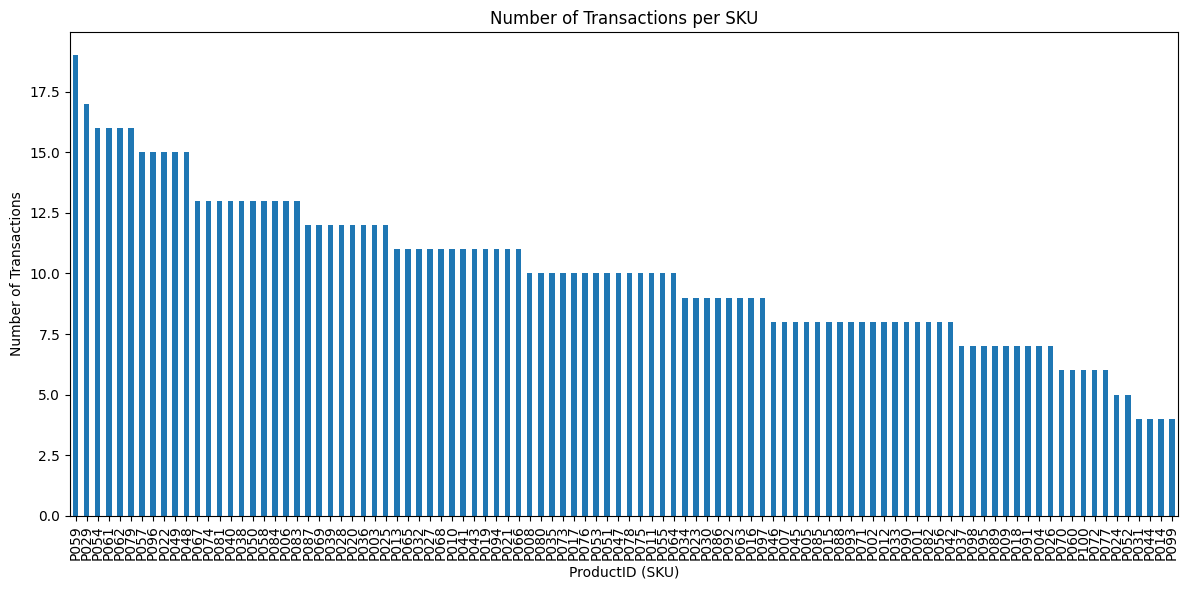

count    100.000000
mean      10.000000
std        3.120477
min        4.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       19.000000
Name: count, dtype: float64

In [7]:
import matplotlib.pyplot as plt

# Count number of transactions per SKU (ProductID)
transactions_per_sku = df['ProductID'].value_counts().sort_values(ascending=False)

# Plotting the histogram
plt.figure(figsize=(12, 6))
transactions_per_sku.plot(kind='bar')
plt.title('Number of Transactions per SKU')
plt.xlabel('ProductID (SKU)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Generate descriptive statistics for number of transactions per SKU
transactions_per_sku_stats = transactions_per_sku.describe()

transactions_per_sku_stats

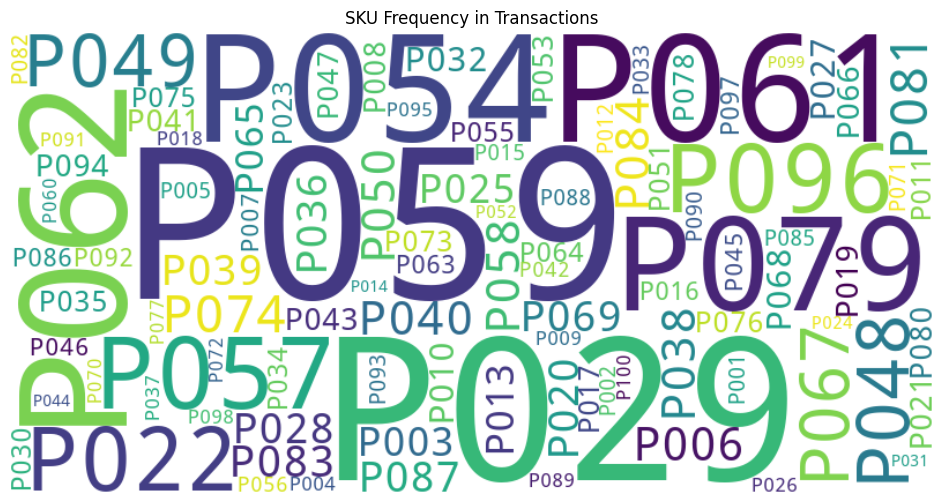

ProductID
P059    19
P029    17
P054    16
P061    16
P062    16
P079    16
P057    15
P096    15
P022    15
P049    15
P048    15
P067    13
P074    13
P081    13
P040    13
P038    13
P050    13
P058    13
P084    13
P006    13
Name: count, dtype: int64


In [8]:
from wordcloud import WordCloud

# Create a frequency dictionary for SKUs
sku_freq = df['ProductID'].value_counts().to_dict()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sku_freq)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SKU Frequency in Transactions')
plt.show()



In [31]:
# Sort the DataFrame by TransactionDate
df_sorted = df.sort_values('TransactionDate')

# Extract just the date part for grouping
df_sorted['TransactionDay'] = df_sorted['TransactionDate'].dt.date

# Group by date, collect transactions, and count them
grouped_with_counts = df_sorted.groupby('TransactionDay').agg(
    TransactionList=('TransactionID', list),
    TransactionCount=('TransactionID', 'count')
).reset_index()
print(grouped_with_counts)

    TransactionDay                                   TransactionList  \
0       2023-12-30                                          [T00869]   
1       2023-12-31                          [T00605, T00154, T00845]   
2       2024-01-01                  [T00818, T00943, T00909, T00526]   
3       2024-01-02                  [T00600, T00343, T00641, T00527]   
4       2024-01-03                  [T00418, T00134, T00669, T00760]   
..             ...                                               ...   
332     2024-12-24                          [T00369, T00678, T00929]   
333     2024-12-25                  [T00570, T00537, T00619, T00750]   
334     2024-12-26  [T00690, T00292, T00341, T00287, T00442, T00698]   
335     2024-12-27                                  [T00374, T00951]   
336     2024-12-28                                          [T00333]   

     TransactionCount  
0                   1  
1                   3  
2                   4  
3                   4  
4              

#### Daily注文集計
**Prompt**
```
Please sort the transaction by Transaction Date and group the transaction fall in the same date using key as the date, value as transaction list. also add a column at the end of the statistic dataframe as the number of transactions happens on the same date.  
Please create a histogram plotting the number of transactions per day also marking the week ends
please list up the top 10 dates where the number of transactions are most.
What does weekday 0 mean?
```
weekday = 0 は、Python の datetime モジュールにおいて 月曜日（Monday） を意味します。
曜日の数値表現は次のようになっています：

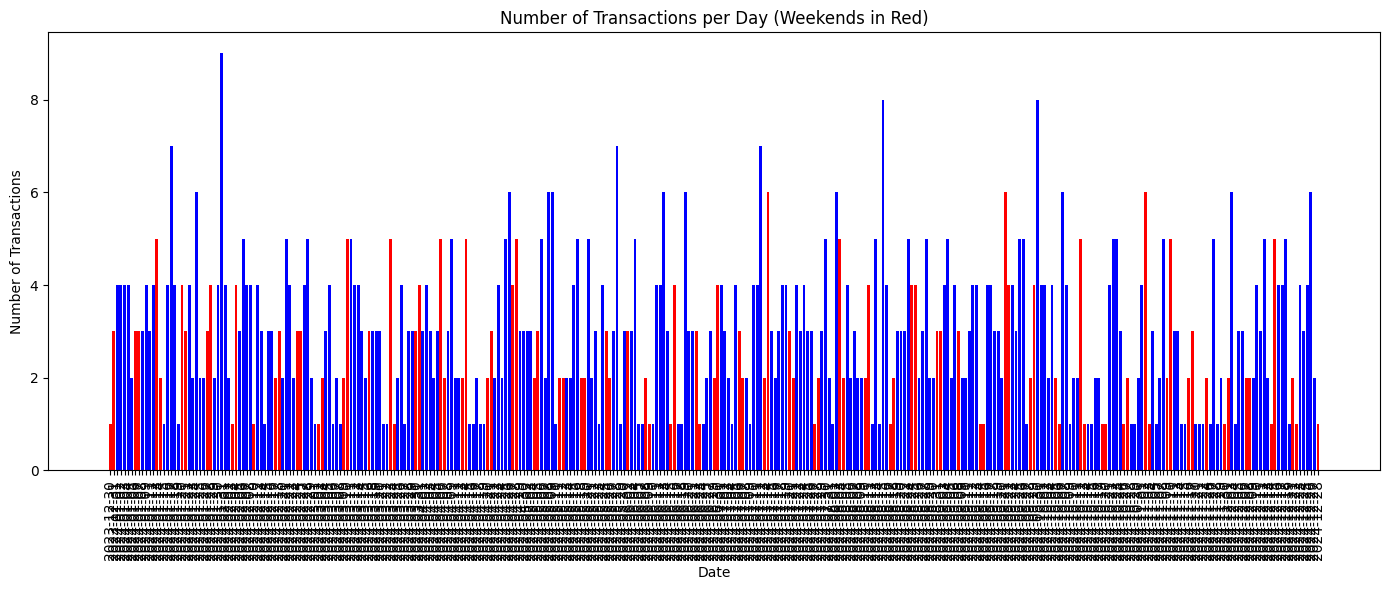

In [32]:
# Add weekday information to the grouped DataFrame
grouped_with_counts['Weekday'] = pd.to_datetime(grouped_with_counts['TransactionDay']).dt.dayofweek
grouped_with_counts['IsWeekend'] = grouped_with_counts['Weekday'] >= 5  # Saturday = 5, Sunday = 6

# Plot histogram with different color for weekends
plt.figure(figsize=(14, 6))
colors = grouped_with_counts['IsWeekend'].map({True: 'red', False: 'blue'})
plt.bar(grouped_with_counts['TransactionDay'].astype(str), grouped_with_counts['TransactionCount'], color=colors)
plt.xticks(rotation=90)
plt.title('Number of Transactions per Day (Weekends in Red)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [35]:
# Get the top 10 dates with the most transactions
top_10_transaction_days = grouped_with_counts.nlargest(10, 'TransactionCount')

print(top_10_transaction_days)

    TransactionDay                                    TransactionList  \
31      2024-01-31  [T00204, T00362, T00585, T00849, T00235, T0020...   
215     2024-08-15  [T00431, T00408, T00601, T00700, T00130, T0021...   
258     2024-09-30  [T00311, T00709, T00823, T00596, T00053, T0044...   
17      2024-01-17  [T00459, T00904, T00319, T00344, T00036, T0052...   
141     2024-05-28  [T00507, T00956, T00393, T00758, T00989, T0033...   
181     2024-07-12  [T00755, T00623, T00155, T00533, T00653, T0041...   
24      2024-01-24   [T00240, T00842, T00144, T00342, T00413, T00347]   
111     2024-04-26   [T00739, T00920, T00602, T00667, T00538, T00138]   
122     2024-05-08   [T00979, T00100, T00822, T00540, T00182, T00483]   
123     2024-05-09   [T00434, T00017, T00560, T00079, T00173, T00280]   

     TransactionCount  Weekday  IsWeekend  
31                  9        2      False  
215                 8        3      False  
258                 8        0      False  
17                  

#### 注文時間別分析
**Prompt**
```
Please sort the transactions according to the transaction time, then please calculate the time interval in hour between each neighboring transactions and do the statistics and draw a histogram where the horizontal axis is the hour between neighboring transactions and the vertical axis is the number of neighboring transactions
```

こちらは隣接する取引間の時間間隔（単位：時間）のヒストグラムとその統計情報です：

 - 件数：999
 - 平均：8.74 時間
 - 標準偏差：8.87 時間
 - 最小：0.002 時間（約7秒）
 - 最大：63.95 時間（約2.7日）
 - 中央値：5.82 時間
 - 四分位数：2.63（25%）、12.18（75%）

多くの取引は比較的短い時間間隔で発生しています。

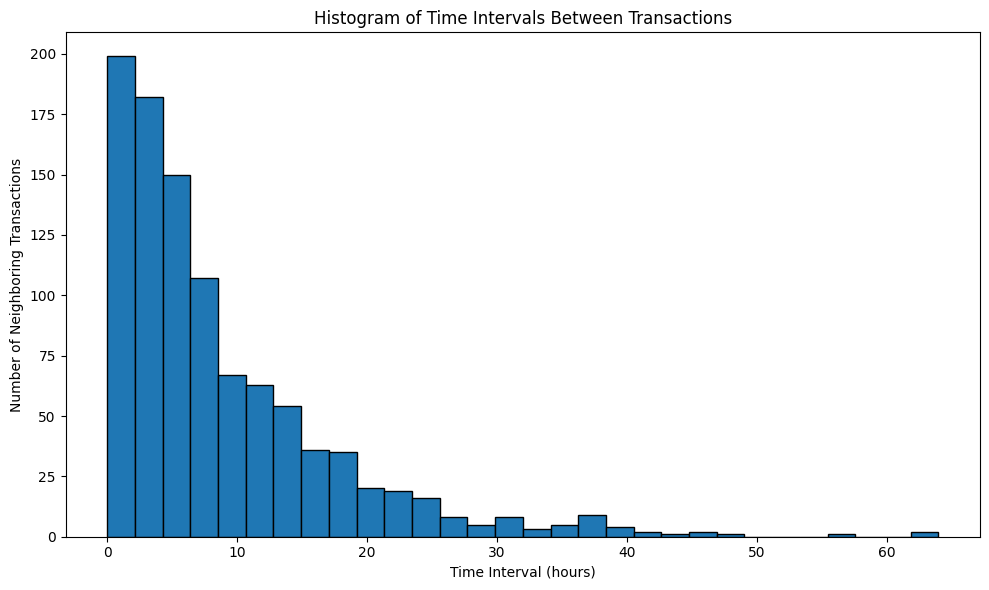

count    999.000000
mean       8.740254
std        8.866847
min        0.001944
25%        2.632222
50%        5.816667
75%       12.178611
max       63.948333
Name: TimeDiffHours, dtype: float64

In [36]:
# Sort the DataFrame by TransactionDate
df_sorted_by_time = df.sort_values('TransactionDate').reset_index(drop=True)

# Calculate the time difference in hours between consecutive transactions
df_sorted_by_time['TimeDiffHours'] = df_sorted_by_time['TransactionDate'].diff().dt.total_seconds() / 3600

# Drop the first row which will have NaN for time difference
time_diffs = df_sorted_by_time['TimeDiffHours'].dropna()

# Generate descriptive statistics
time_diff_stats = time_diffs.describe()

# Plot histogram of time differences
plt.figure(figsize=(10, 6))
plt.hist(time_diffs, bins=30, edgecolor='black')
plt.title('Histogram of Time Intervals Between Transactions')
plt.xlabel('Time Interval (hours)')
plt.ylabel('Number of Neighboring Transactions')
plt.tight_layout()
plt.show()

time_diff_stats

## 面白いことをやります
### データー再構成
**Prompt**
```
please aggregate the transactions based on sorted transactions, and assign each transaction a cluster number using the following criteria. 1. if the neighboring transactions happens within 1 hour, they will be assigned in same cluster, 2. if a cluster is more than 10 transactions, the neighboring  transaction close to the 10th transaction in the cluster shall be assigned with a new cluster ID.
```

**下記のクラスター構成についてAIで生成したコードを読んで、自分で調整を行っていた**

In [45]:
# 2. 初始化聚类相关变量
cluster_ids = []
current_cluster = 0
cluster_size = 0
prev_time = df_sorted.loc[0, 'TransactionDate']

# 3. 遍历每一笔交易，按规则分配 ClusterID
for i, row in df_sorted.iterrows():
    if i == 0:
        # 第1笔交易自动归入第0号簇
        cluster_ids.append(current_cluster)
        cluster_size = 1
        continue

    time_diff = (row['TransactionDate'] - prev_time).total_seconds() / (3600 * 10)

    # 如果与上一笔交易时间间隔超过1小时，或当前簇已包含10笔交易
    if time_diff > 1 or cluster_size >= 5:
        # 开始一个新簇
        current_cluster += 1
        cluster_size = 1
    else:
        # 保持在当前簇中
        cluster_size += 1

    cluster_ids.append(current_cluster)
    prev_time = row['TransactionDate']

# 4. 将 ClusterID 添加回 DataFrame
df_sorted['ClusterID'] = cluster_ids

print(df_sorted)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
225        T00869      C0081      P061 2023-12-30 15:29:12         2   
32         T00605      C0017      P057 2023-12-31 03:27:43         4   
822        T00154      C0040      P020 2023-12-31 06:53:54         4   
729        T00845      C0154      P083 2023-12-31 15:44:04         2   
49         T00818      C0161      P049 2024-01-01 03:54:19         1   
..            ...        ...       ...                 ...       ...   
5          T00442      C0188      P067 2024-12-26 14:40:03         1   
539        T00698      C0119      P011 2024-12-26 21:34:07         1   
193        T00374      C0181      P038 2024-12-27 17:31:24         2   
390        T00951      C0197      P027 2024-12-27 18:20:31         2   
638        T00333      C0101      P015 2024-12-28 11:00:00         3   

     TotalValue   Price TransactionDay  ClusterID  
225      313.92  156.96     2023-12-30          0  
32       958.80  239.70     202

**Prompt**
```
please sort using the number of transactions in each cluster and plot the result using horizontal axis as the cluster.
```

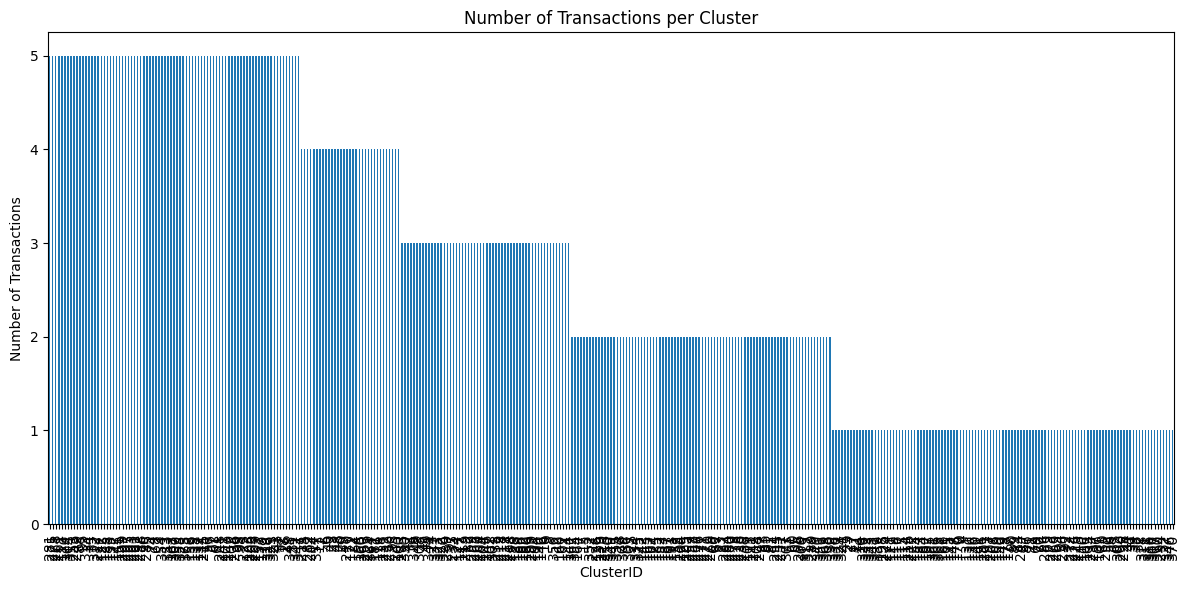

In [46]:
# Count number of transactions per cluster
cluster_counts = df_sorted['ClusterID'].value_counts().sort_values(ascending=False)

# Plot the cluster sizes
plt.figure(figsize=(12, 6))
cluster_counts.plot(kind='bar')
plt.title('Number of Transactions per Cluster')
plt.xlabel('ClusterID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ClusterIDに基づいて新規注文データーの作成
目的：一つの倉庫で一日発生した注文で、一つの注文に複数の品目が注文されたり、一つだけ注文されたりする注文データーを作成して、AGVのシミュレーションを行う

In [3]:
import heapq

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0 + manhattan(start, goal), 0, start))
    
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current_g, current = heapq.heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        neighbors = [
            (current[0]+1, current[1]),
            (current[0]-1, current[1]),
            (current[0], current[1]+1),
            (current[0], current[1]-1),
        ]

        for neighbor in neighbors:
            r, c = neighbor
            if 0 <= r < rows and 0 <= c < cols and grid[r][c] < 2:
                tentative_g = current_g + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_set, (f_score, tentative_g, neighbor))
                    came_from[neighbor] = current

    return None  # No path found

# Example usage
if __name__ == "__main__":
    grid = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
    start = (0, 0)
    goal = (2, 5)
    path = a_star(grid, start, goal)
    print("Path:", path)

Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5)]


In [15]:
from IPython.display import HTML
import json

# Grid and block size
grid_width = 20
grid_height = 20
cell_size = 30

grid = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
blocker_1_start = (0, 0)
blocker_1_goal = (2, 5)
path_block_1 = a_star(grid, start, goal)
    #print("Path:", path_block_1)


# Define paths
#path_block_1 = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2)]
path_block_2 = [(0, 5), (1, 5), (2, 5), (3, 6), (4, 7), (5, 7)]

# Obstacles
obstacle_blocks = [(x, 2) for x in range(5, 11)]
leftmost_obstacle = {"x": 5, "y": 2}

# Convert to JSON
js_path_1 = json.dumps([{"x": x, "y": y} for x, y in path_block_1])
js_path_2 = json.dumps([{"x": x, "y": y} for x, y in path_block_2])
js_obstacles = json.dumps([{"x": x, "y": y} for x, y in obstacle_blocks])
js_leftmost = json.dumps(leftmost_obstacle)

html_code = f"""
<div style="margin-bottom:10px;">
  <label>Speed (blocks/sec): </label>
  <input type="range" id="speedSlider" min="1" max="10" step="1" value="3" />
  <span id="speedValue">3</span> blocks/sec
  <button id="startButton">Start Animation</button>
</div>

<div id="container" style="width:{grid_width * cell_size}px; height:{grid_height * cell_size}px; border:1px solid #ccc; position:relative; background-color:#f9f9f9;">
  <svg id="pathCanvas" width="{grid_width * cell_size}" height="{grid_height * cell_size}" style="position:absolute; top:0; left:0; z-index:0;"></svg>
</div>

<script>
(function() {{
  const container = document.getElementById('container');
  const svg = document.getElementById('pathCanvas');
  const startButton = document.getElementById('startButton');
  const speedSlider = document.getElementById('speedSlider');
  const speedDisplay = document.getElementById('speedValue');
  const cellSize = {cell_size};
  let speedBlocksPerSec = parseInt(speedSlider.value);

  const paths = [{js_path_1}, {js_path_2}];
  const obstacles = {js_obstacles};
  const leftmostObstacle = {js_leftmost};

  speedSlider.oninput = () => {{
    speedBlocksPerSec = parseInt(speedSlider.value);
    speedDisplay.textContent = speedBlocksPerSec;
  }};

  // Draw grid
  for (let row = 0; row < {grid_height}; row++) {{
    for (let col = 0; col < {grid_width}; col++) {{
      const cell = document.createElement('div');
      cell.style.position = "absolute";
      cell.style.width = cellSize + "px";
      cell.style.height = cellSize + "px";
      cell.style.left = (col * cellSize) + "px";
      cell.style.top = (row * cellSize) + "px";
      cell.style.boxSizing = "border-box";
      cell.style.border = "1px solid #eee";
      container.appendChild(cell);
    }}
  }}

  // Draw green obstacles
  const obstacleDivs = [];
  for (const pos of obstacles) {{
    const div = document.createElement('div');
    div.style.position = "absolute";
    div.style.width = cellSize + "px";
    div.style.height = cellSize + "px";
    div.style.left = (pos.x * cellSize) + "px";
    div.style.top = (pos.y * cellSize) + "px";
    div.style.backgroundColor = "green";
    container.appendChild(div);
    obstacleDivs.push({{ x: pos.x, y: pos.y, node: div }});
  }}

  function createLine(p1, p2, color) {{
    const line = document.createElementNS("http://www.w3.org/2000/svg", "line");
    line.setAttribute("x1", p1.x * cellSize + cellSize / 2);
    line.setAttribute("y1", p1.y * cellSize + cellSize / 2);
    line.setAttribute("x2", p2.x * cellSize + cellSize / 2);
    line.setAttribute("y2", p2.y * cellSize + cellSize / 2);
    line.setAttribute("stroke", color);
    line.setAttribute("stroke-width", 2);
    svg.appendChild(line);
    return line;
  }}

  function createPathLines(path, color) {{
    const lines = [];
    for (let i = 0; i < path.length - 1; i++) {{
      lines.push(createLine(path[i], path[i + 1], color));
    }}
    return lines;
  }}

  function moveAlongPath(agent, path, color, onFinish) {{
    const lines = createPathLines(path, color);
    let i = 0;
    function step() {{
      if (i >= path.length) {{
        if (onFinish) onFinish();
        return;
      }}
      const pos = path[i];
      agent.square.style.left = (pos.x * cellSize) + "px";
      agent.square.style.top = (pos.y * cellSize) + "px";
      if (i > 0 && lines[i - 1] && lines[i - 1].parentNode) {{
        svg.removeChild(lines[i - 1]);
      }}
      i++;
      setTimeout(step, 1000 / speedBlocksPerSec);
    }}
    step();
  }}

  const agents = paths.map((path, i) => {{
    const color = i === 0 ? "steelblue" : "crimson";
    const square = document.createElement('div');
    square.style.position = "absolute";
    square.style.width = cellSize + "px";
    square.style.height = cellSize + "px";
    square.style.backgroundColor = color;
    container.appendChild(square);
    const lines = createPathLines(path, color);
    return {{
      path,
      square,
      color,
      step: 0,
      lines
    }};
  }});

  function handleReturn(agent, pos) {{
    const up = {{ x: pos.x, y: pos.y - 1 }};
    const down = pos;
    const homePath = [];
    let cx = pos.x;
    let cy = pos.y;
    while (cx > 0) {{
      homePath.push({{ x: cx, y: cy }});
      cx--;
    }}
    while (cy > 0) {{
      homePath.push({{ x: cx, y: cy }});
      cy--;
    }}
    homePath.push({{ x: 0, y: 0 }});

    const upLine = createLine(pos, up, "steelblue");
    setTimeout(() => {{
      agent.square.style.left = (up.x * cellSize) + "px";
      agent.square.style.top = (up.y * cellSize) + "px";
      if (upLine.parentNode) svg.removeChild(upLine);

      const downLine = createLine(up, down, "steelblue");
      setTimeout(() => {{
        agent.square.style.left = (down.x * cellSize) + "px";
        agent.square.style.top = (down.y * cellSize) + "px";
        if (downLine.parentNode) svg.removeChild(downLine);
          const greenDiv = document.createElement('div');
          greenDiv.style.position = "absolute";
          greenDiv.style.width = cellSize + "px";
          greenDiv.style.height = cellSize + "px";
          greenDiv.style.left = (pos.x * cellSize) + "px";
          greenDiv.style.top = (pos.y * cellSize) + "px";
          greenDiv.style.backgroundColor = "green";
          container.appendChild(greenDiv);

        // Back to blue and go home
        agent.square.style.backgroundColor = agent.color;
        moveAlongPath(agent, homePath, agent.color, null);

      }}, 1000 / speedBlocksPerSec);

    }}, 1000 / speedBlocksPerSec);
  }}

  function moveAgent(agent, checkGoal = false) {{
    if (agent.step >= agent.path.length) return;
    const pos = agent.path[agent.step];
    agent.square.style.left = (pos.x * cellSize) + "px";
    agent.square.style.top = (pos.y * cellSize) + "px";
    if (agent.step > 0) {{
      const line = agent.lines[agent.step - 1];
      if (line && line.parentNode) svg.removeChild(line);
    }}

    if (checkGoal &&
        pos.x === leftmostObstacle.x &&
        pos.y === leftmostObstacle.y) {{
      agent.square.style.backgroundColor = "yellow";
      obstacleDivs.forEach(obs => {{
        if (obs.x === pos.x && obs.y === pos.y && obs.node.parentNode)
          obs.node.parentNode.removeChild(obs.node);
      }});
      handleReturn(agent, pos);
      return;
    }}

    agent.step++;
    setTimeout(() => moveAgent(agent, checkGoal), 1000 / speedBlocksPerSec);
  }}

  startButton.addEventListener("click", () => {{
    agents.forEach((agent, i) => {{
      agent.step = 0;
      agent.square.style.backgroundColor = agent.color;
      const pos = agent.path[0];
      agent.square.style.left = (pos.x * cellSize) + "px";
      agent.square.style.top = (pos.y * cellSize) + "px";
      agent.lines.forEach(line => {{
        if (!svg.contains(line)) svg.appendChild(line);
      }});
      setTimeout(() => moveAgent(agent, i === 0), 0);
    }});
  }});
}})();
</script>
"""

HTML(html_code)

In [ ]:
find the top 10 transaction and animate

In [22]:
top_10 = df['ProductID'].value_counts().nlargest(10).index
print(top_10)
filtered_df = df[df['ProductID'].isin(top_10)]
len(filtered_df)

Index(['P059', 'P029', 'P054', 'P061', 'P062', 'P079', 'P057', 'P096', 'P022',
       'P049'],
      dtype='object', name='ProductID')


160

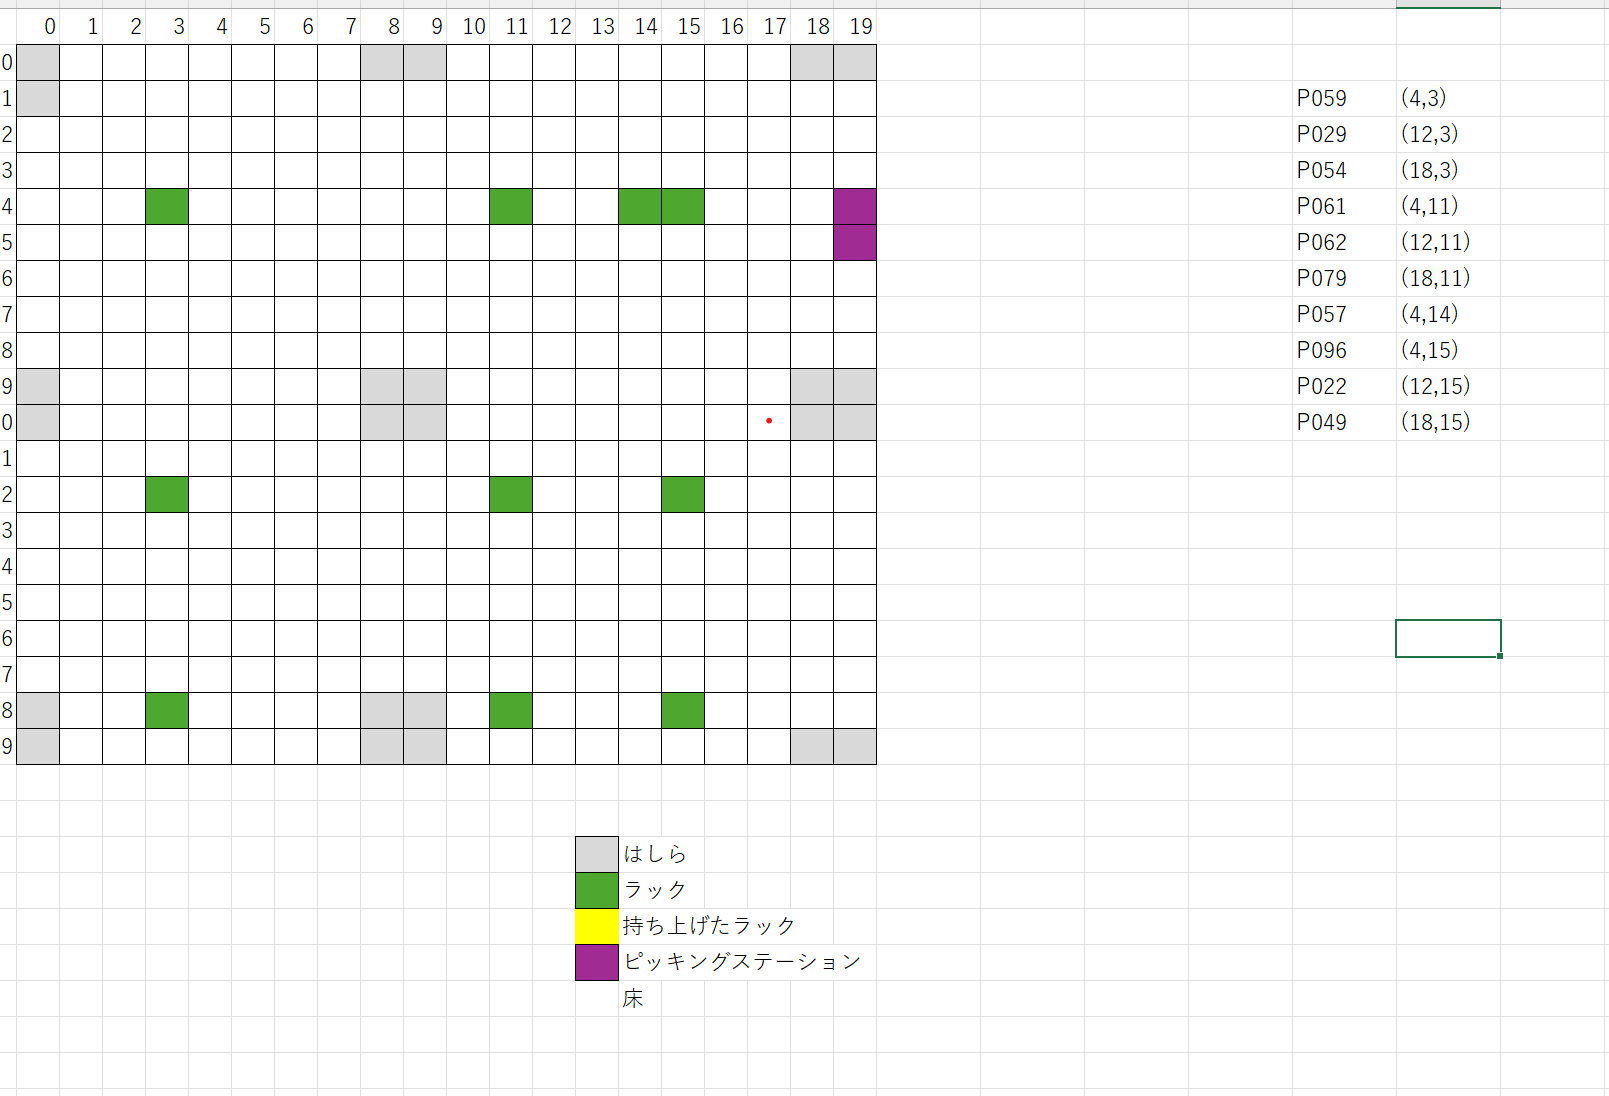